In [29]:
import pandas as pd
import matplotlib.pyplot as plt
figsize = (12, 8)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
# load the metrics
vit_ensemble = pd.read_csv("vit_ensemble_metrics_stack.csv")
conv_ensemble = pd.read_csv("conv_ensemble_metrics_stack.csv")
vit_base_16 = pd.read_csv("vit_base_16_metrics_stack.csv")

In [30]:
vit_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
vit_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000
mean,0.807924,0.787888
std,0.001816,0.001955
min,0.805419,0.784703
25%,0.806428,0.786228
50%,0.807870,0.787939
75%,0.809167,0.789233
max,0.811185,0.791813


In [31]:
conv_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
conv_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000
mean,0.816671,0.780537
std,0.002495,0.002615
min,0.810897,0.774040
25%,0.814860,0.779081
50%,0.817383,0.780835
75%,0.818175,0.782143
max,0.822427,0.786583


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Exactitud de los Modelos sobre el Conjunto de Prueba')

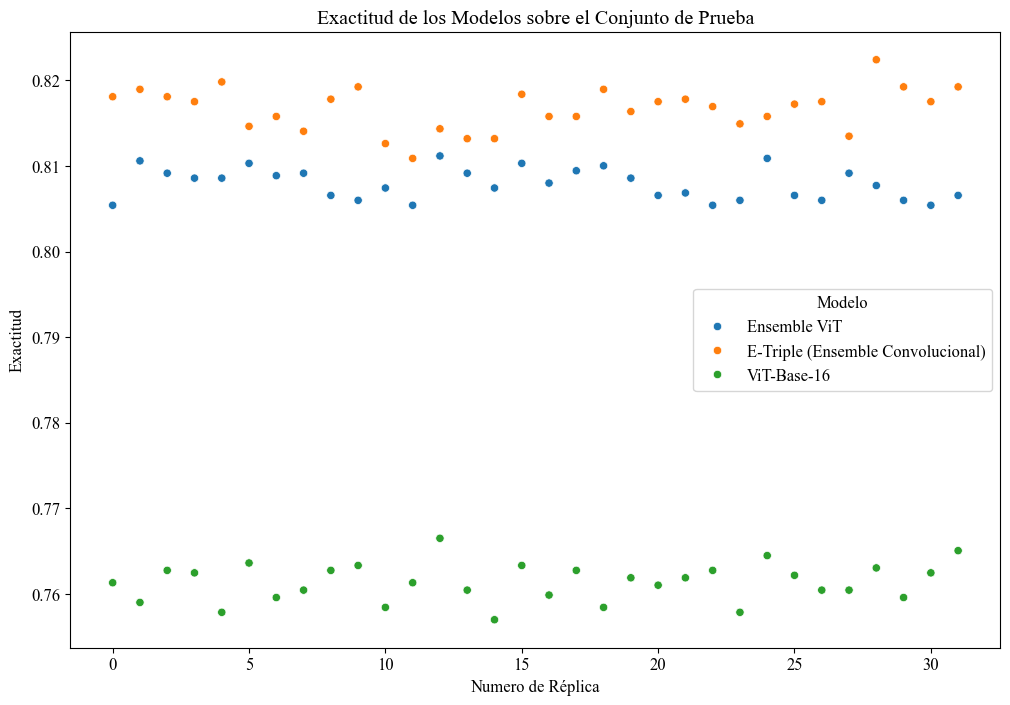

In [33]:
all_metrics = pd.concat(
    [
        vit_ensemble,
        conv_ensemble,
        vit_base_16,
    ],
    axis=0,
)


all_metrics["Modelo"] = (
    ["Ensemble ViT"] * vit_ensemble.shape[0]
    + ["E-Triple (Ensemble Convolucional)"] * conv_ensemble.shape[0]
    + ["ViT-Base-16"] * vit_base_16.shape[0]
)

all_metrics


plt.figure(figsize=figsize)
sns.scatterplot(data=all_metrics, x=all_metrics.index, y="test/Accuracy", hue="Modelo")
plt.xlabel("Número de Réplica")
plt.ylabel("Exactitud")
plt.title("Exactitud de los Modelos sobre el Conjunto de Prueba") 

Text(0.5, 1.0, 'Exactitud de los Modelos sobre el Conjunto de Prueba')

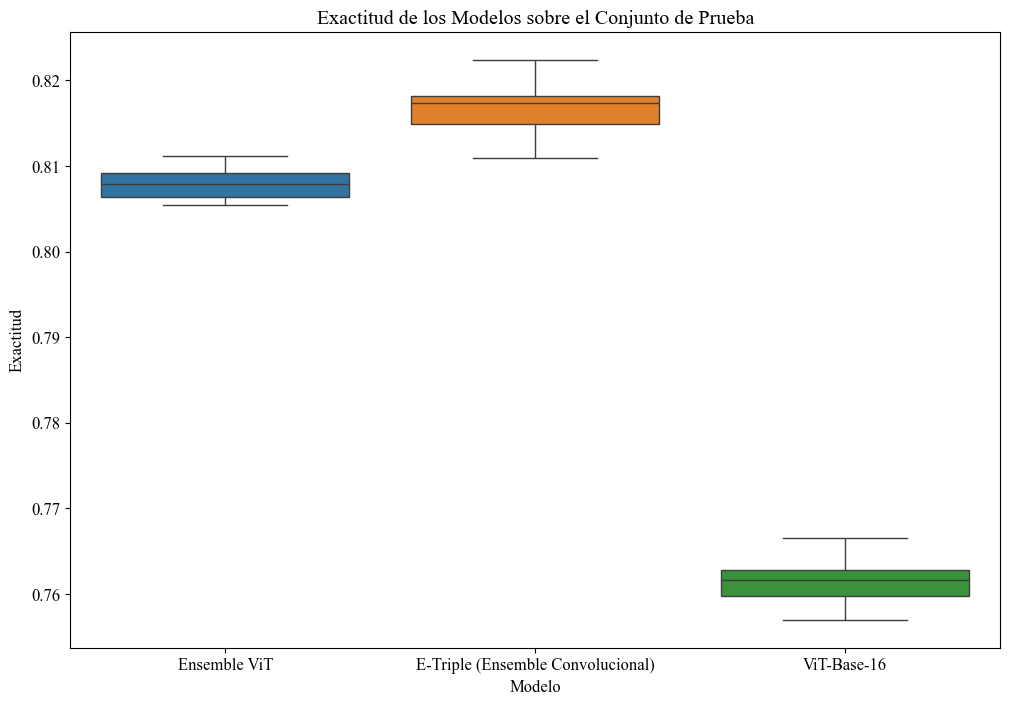

In [34]:
plt.figure(figsize=figsize)
sns.boxplot(data=all_metrics, x="Modelo", y="test/Accuracy", hue="Modelo")
plt.xlabel("Modelo")
plt.ylabel("Exactitud")
plt.title("Exactitud de los Modelos sobre el Conjunto de Prueba")

Text(0.5, 1.0, 'Promedio Exactitud Macro de los Modelos sobre el Conjunto de Prueba')

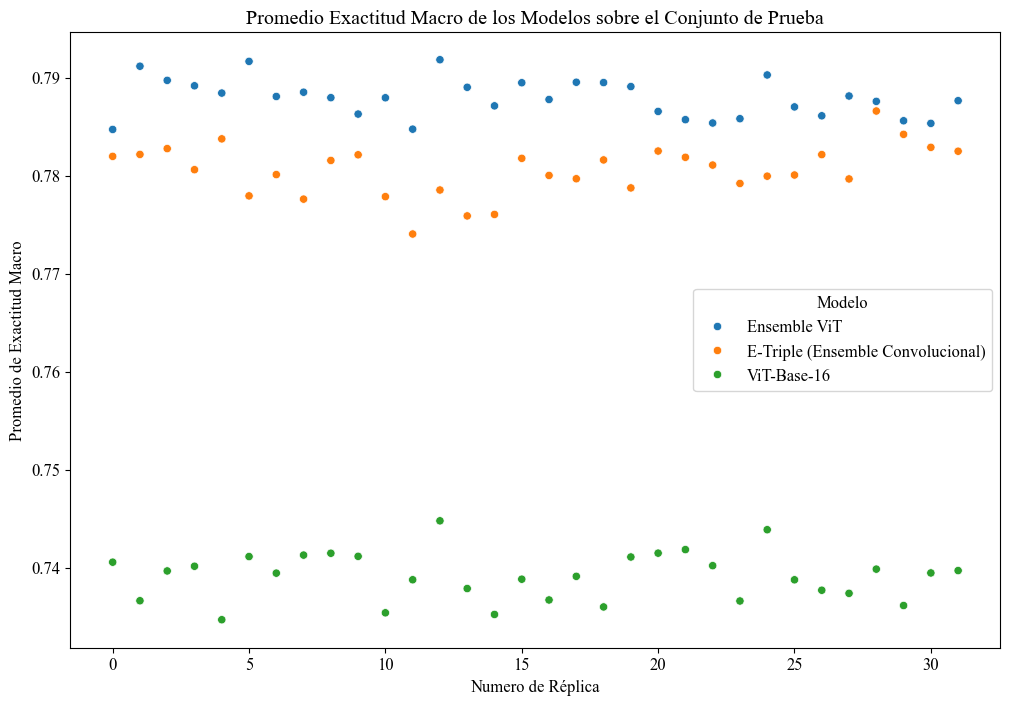

In [35]:
plt.figure(figsize=figsize)
sns.scatterplot(
    data=all_metrics, x=all_metrics.index, y="test/BalancedAccuracy", hue="Modelo"
)

plt.xlabel("Número de Réplica")
plt.ylabel("Promedio de Exactitud Macro")
plt.title("Promedio Exactitud Macro de los Modelos sobre el Conjunto de Prueba")

Text(0.5, 1.0, 'Promedio Exactitud Macro de los Modelos sobre el Conjunto de Prueba')

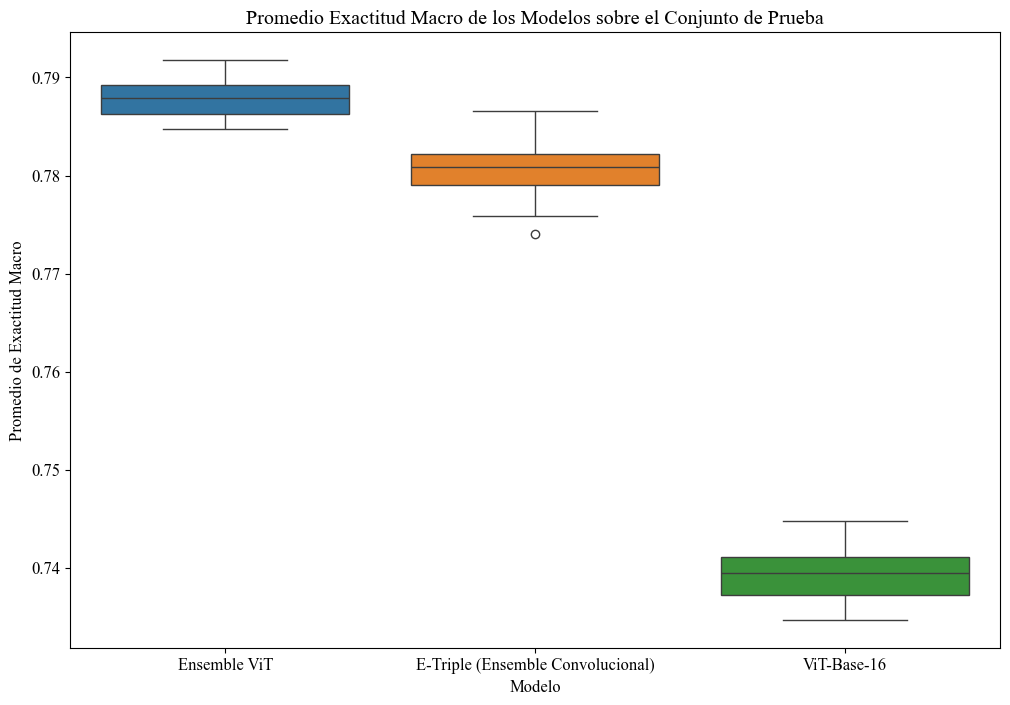

In [36]:
plt.figure(figsize=figsize)
sns.boxplot(data=all_metrics, x="Modelo", y="test/BalancedAccuracy", hue="Modelo")
plt.xlabel("Modelo")
plt.ylabel("Promedio de Exactitud Macro")
plt.title("Promedio Exactitud Macro de los Modelos sobre el Conjunto de Prueba")

# Statistical Testing for the Mean of a Normal Distribution of the response variable

Text(0, 0.5, 'Valores Ordenados')

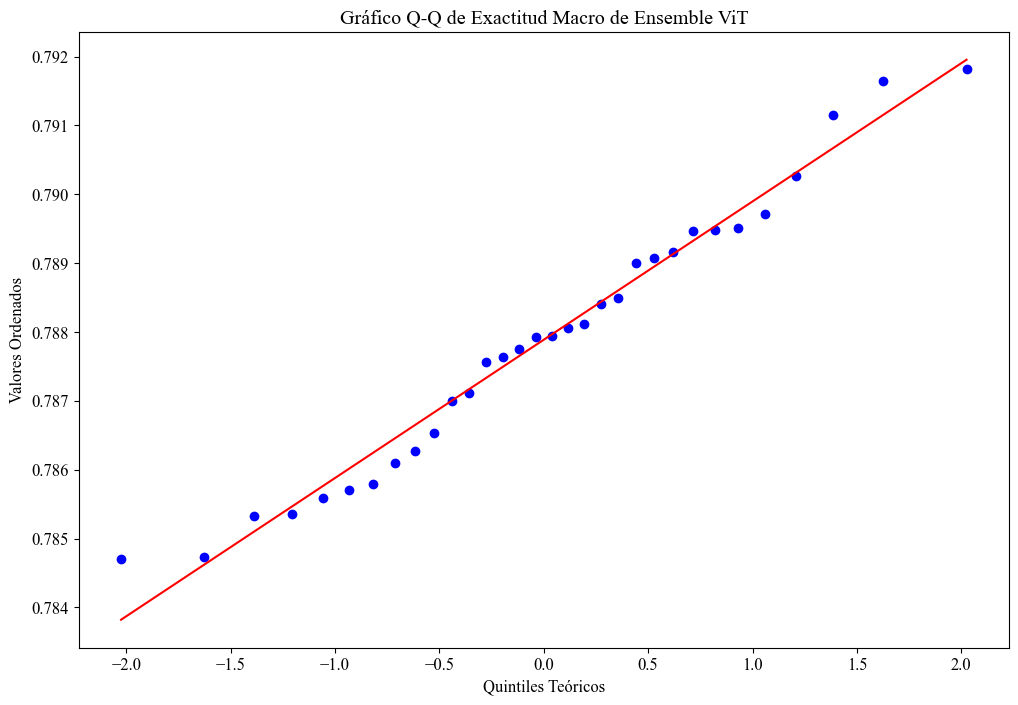

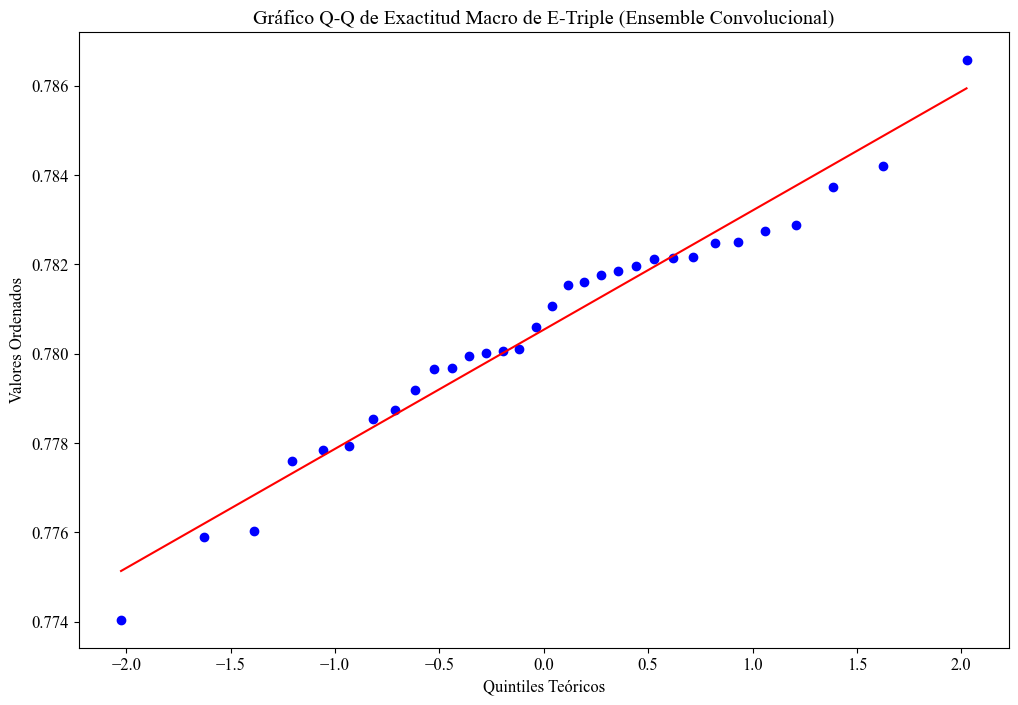

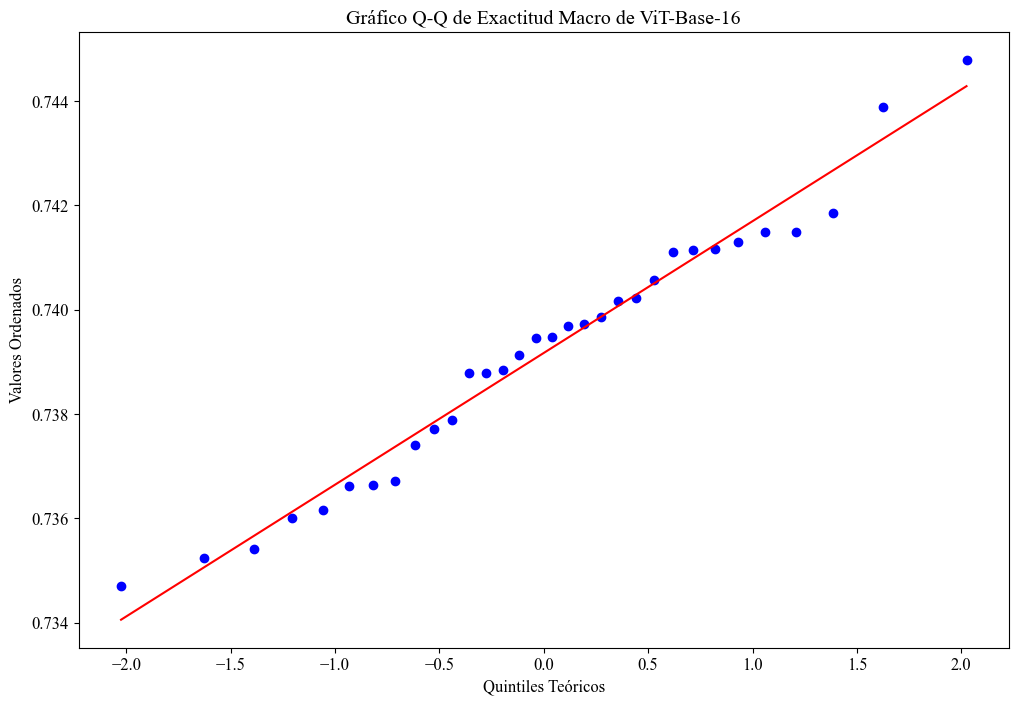

In [37]:
import scipy.stats as stats

alpha = 0.05
# we use the qq plots to check if data is normally distributed

plt.figure(figsize=figsize)
stats.probplot(vit_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Exactitud Macro de Ensemble ViT")
plt.xlabel("Quintiles Teóricos")
plt.ylabel("Valores Ordenados")


plt.figure(figsize=figsize)
stats.probplot(conv_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Exactitud Macro de E-Triple (Ensemble Convolucional)")
plt.xlabel("Quintiles Teóricos")
plt.ylabel("Valores Ordenados")


plt.figure(figsize=figsize)
stats.probplot(vit_base_16["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Exactitud Macro de ViT-Base-16")
plt.xlabel("Quintiles Teóricos")
plt.ylabel("Valores Ordenados")

## Normality Assumption using the Shapiro-Wilk Test

In [38]:
def check_normality(df: pd.DataFrame, name: str):
    print(f"-Checking normality for {name} using Shapiro-Wilk Tests- alpha {alpha}")
    shapiro_stat, shapiro_p = stats.shapiro(df["test/BalancedAccuracy"])
    print(f"Shapiro Statistic: {shapiro_stat}")
    print(f"Shapiro P Value: {shapiro_p}")
    print()
    if shapiro_p < alpha:
        print(f"The data {name} is not normally distributed")
    else:
        print(f"The data {name} is normally distributed")
    print()
    return shapiro_stat, shapiro_p


shapiros = {}
shapiros["vit_ensemble"] = check_normality(vit_ensemble, "VIT Ensemble")
shapiros["conv_ensemble"] = check_normality(conv_ensemble, "Conv Ensemble")
shapiros["vit_base_16"] = check_normality(vit_base_16, "VIT Base 16")
shapiros = pd.DataFrame(shapiros, index=["shapiro_stat", "shapiro_p"]).T
shapiros

-Checking normality for VIT Ensemble using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.9689071397528256
Shapiro P Value: 0.4697932027492762

The data VIT Ensemble is normally distributed

-Checking normality for Conv Ensemble using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.975314236988187
Shapiro P Value: 0.6566168728405842

The data Conv Ensemble is normally distributed

-Checking normality for VIT Base 16 using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.973891761094334
Shapiro P Value: 0.6129215517764093

The data VIT Base 16 is normally distributed



,shapiro_stat,shapiro_p
vit_ensemble,0.968907,0.469793
conv_ensemble,0.975314,0.656617
vit_base_16,0.973892,0.612922


## Levene Test for Homogeneity of Variance

In [39]:
# Levene test is for equal variances
levene_stat, levene_p = stats.levene(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
)
print(f'-Levene Test- alpha {alpha}')
print(f"Levene Stat: {levene_stat}")
print(f"Levene p-value: {levene_p}")
if levene_p < alpha:
    print("The variances are not equal")
    can_make_anova = False
else:
    print("The variances are equal")

-Levene Test- alpha 0.05
Levene Stat: 1.0034989962104799
Levene p-value: 0.37052875171880056
The variances are equal


## ANOVA Test for the Mean of a Normal Distribution

In [40]:
# ANOVA test
fvalue, pvalue = stats.f_oneway(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
)

print(f"-ANOVA Test- alpha {alpha}")
print(f"F Statistic: {fvalue}")
print(f"P Value: {pvalue}")
if pvalue < alpha:
    print("Reject the null hypothesis, the means are not equal")
    print(
        "There is a significant difference between the models in terms of balanced accuracy"
    )
else:
    print("Fail to reject the null hypothesis, the means are equal")
    print(
        "There is no significant difference between the models in terms of balanced accuracy"
    )

-ANOVA Test- alpha 0.05
F Statistic: 3958.3291548817715
P Value: 1.0385002192996134e-90
Reject the null hypothesis, the means are not equal
There is a significant difference between the models in terms of balanced accuracy


## Tukey's HSD Test for Multiple Comparisons

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# we can use Tukey's HSD test to find out which models are different

# the tukeyhsd test performs multiple pairwise comparisons using the studentized range distribution with

m_comp = pairwise_tukeyhsd(
    all_metrics["test/BalancedAccuracy"], all_metrics["Modelo"], alpha=alpha / 3
)

print(m_comp)


                Multiple Comparison of Means - Tukey HSD, FWER=0.02                 
              group1                 group2    meandiff p-adj  lower   upper  reject
------------------------------------------------------------------------------------
E-Triple (Ensemble Convolucional) Ensemble ViT   0.0074   0.0  0.0057   0.009   True
E-Triple (Ensemble Convolucional)  ViT-Base-16  -0.0414   0.0  -0.043 -0.0397   True
                     Ensemble ViT  ViT-Base-16  -0.0487   0.0 -0.0504 -0.0471   True
------------------------------------------------------------------------------------
